<a href="https://colab.research.google.com/github/Michelhsn/MachineLearning/blob/master/MLPythonBegin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ML em Python

Bibliotecas mais comuns

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [0]:
data = pd.read_csv('/content/sample_data/pokemon.csv')
data.info()
data.corr()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
#             800 non-null int64
Name          799 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,1.000000,0.097712,0.102664,0.094691,0.089199,0.085596,0.012181,0.983428,0.154336
HP,0.097712,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.102664,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.094691,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.089199,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.085596,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.012181,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.983428,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.154336,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


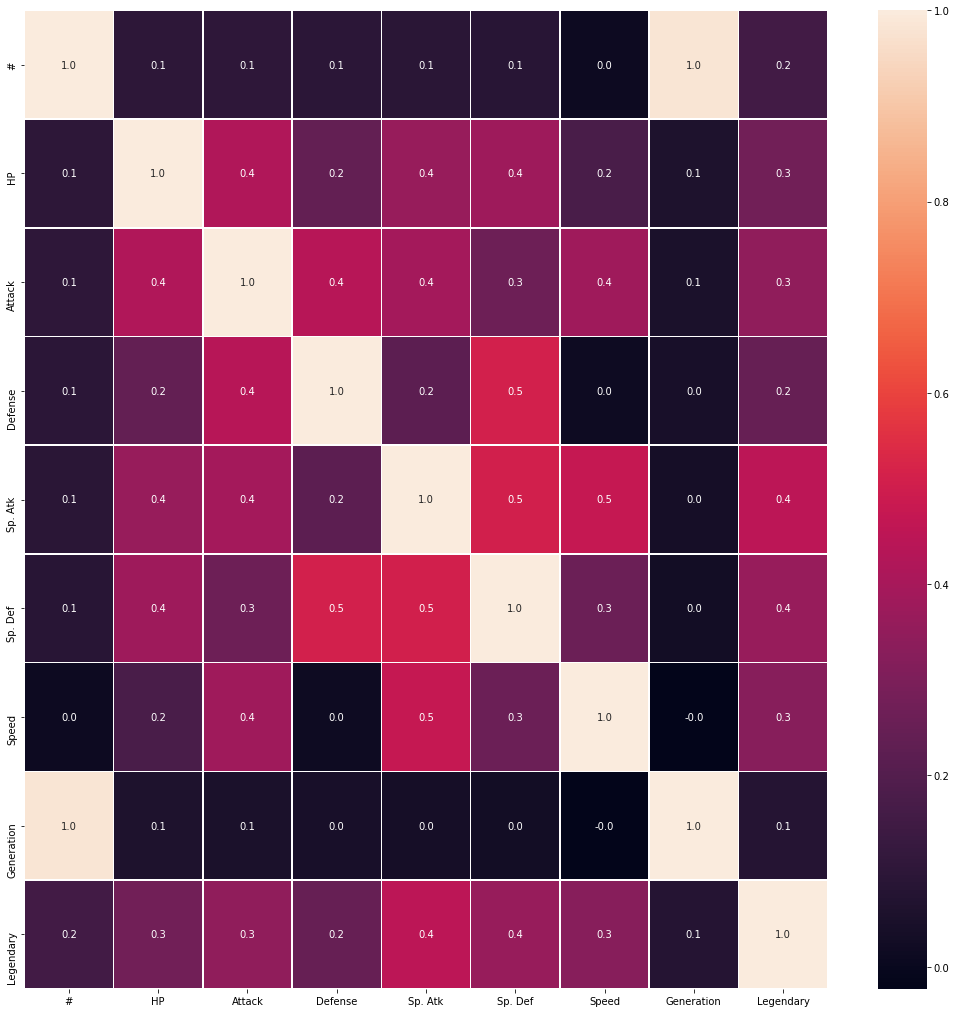

In [0]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [0]:
data.head(10)
data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

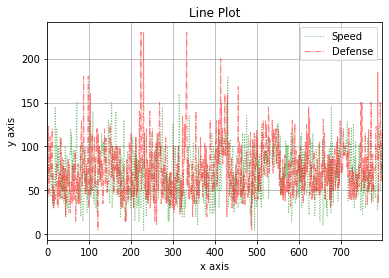

In [0]:
# Line Plot
# color = color, label = label, linewidth = width of line, alpha = opacity, grid = grid, linestyle = sytle of line
data.Speed.plot(kind = 'line', color = 'g',label = 'Speed',linewidth=1,alpha = 0.5,grid = True,linestyle = ':')
data.Defense.plot(color = 'r',label = 'Defense',linewidth=1, alpha = 0.5,grid = True,linestyle = '-.')
plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('x axis')              # label = name of label
plt.ylabel('y axis')
plt.title('Line Plot')            # title = title of plot
plt.show()

Text(0.5, 1.0, 'Attack Defense Scatter Plot')

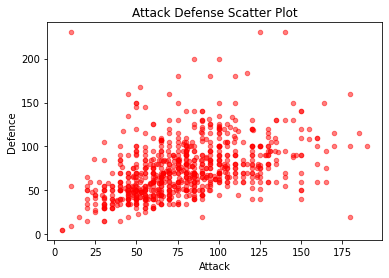

In [0]:
# Scatter Plot 
# x = attack, y = defense
data.plot(kind='scatter', x='Attack', y='Defense',alpha = 0.5,color = 'red')
plt.xlabel('Attack')              # label = name of label
plt.ylabel('Defence')
plt.title('Attack Defense Scatter Plot')            # title = title of plot

In [0]:
data = pd.read_csv('/content/sample_data/train.csv')
data.info()
data.head(10)

In [0]:
# Seleciona as colunas do tipo object
#obj_df = data.select_dtypes(include=['object']).copy()
#obj_df.head()
#clean
#obj_df[obj_df.isnull().any(axis=1)]
#obj_df = obj_df.fillna("0")
#obj_df.head()
data


In [92]:
cleanup_nums = {"TP_SEXO": {"M": 0, "F": 1}}
df_clean = data
df_clean.replace(cleanup_nums, inplace=True)
df_clean = df_clean.fillna(2)
df_clean.head(10)

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,...,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,0,0.0,1,1,4314902.0,Porto Alegre,43.0,RS,1,4,1,2.0,0,2.0,2.0,2,2.0,2,2.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,H,E,5.0,5.0,1.0,0.0,0.0,5,5,0,5,5,5,5,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,1,0.0,3,1,2304707.0,Granja,23.0,CE,2,0,2,1.0,0,23005157.0,2304707.0,Granja,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,A,A,A,A,A,2,2,2.0,2.0,2.0,2.0,2.0,5,5,1,1,1,1,1,2.0,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,1,0.0,3,1,2304400.0,Fortaleza,23.0,CE,3,0,1,2.0,0,2.0,2.0,2,2.0,2,2.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,A,2,2,2.0,2.0,2.0,2.0,2.0,5,5,5,5,5,5,5,2.0,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,1,0.0,0,1,3304557.0,Rio de Janeiro,33.0,RJ,1,9,1,2.0,0,2.0,2.0,2,2.0,2,2.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,...,A,B,B,B,A,B,A,B,C,A,B,D,B,C,B,C,F,C,2.0,0.0,5.0,5.0,5.0,5,5,5,5,2,5,5,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,0,0.0,2,1,1505304.0,Oriximiná,15.0,PA,1,4,1,2.0,0,2.0,2.0,2,2.0,2,2.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,B,A,A,A,A,B,A,A,B,A,A,A,B,F,D,5.0,4.0,3.0,5.0,4.0,5,5,4,3,1,4,5,2.0,A,A,A,A,A,A,A,A,A
5,6,a37c99ec251d4f6e8ddbeabadf1c87fdbfddc4d1,2016,2902005,Aracatu,29,BA,18,1,0.0,1,1,2933307.0,Vitória da Conquista,29.0,BA,1,1,1,2.0,0,2.0,2.0,2,2.0,2,2.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,...,B,B,B,A,A,B,A,A,B,B,B,E,A,B,B,A,2,2,2.0,2.0,2.0,2.0,2.0,4,5,5,5,5,5,5,2.0,A,A,A,A,A,A,A,A,A
6,7,63b4e128e9ffe8ab27f5d093db1976ef4f353e0a,2016,5102637,Campo Novo do Parecis,51,MT,18,1,0.0,3,1,2804508.0,Nossa Senhora da Glória,28.0,SE,2,0,2,1.0,0,51010224.0,5102637.0,Campo Novo do Parecis,51.0,MT,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,B,A,B,A,B,A,A,A,D,A,B,B,C,E,B,2.0,0.0,2.0,4.0,2.0,5,5,2,5,2,0,2,0.0,A,A,A,B,B,A,A,A,A
7,8,2eb189d4912f64b19d1967e8e84b6141aba18770,2016,4301602,Bagé,43,RS,18,1,0.0,1,1,3550308.0,São Paulo,35.0,SP,1,1,1,2.0,0,2.0,2.0,2,2.0,2,2.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,...,A,B,B,B,A,B,A,B,C,B,B,D,B,B,B,A,2,2,2.0,2.0,2.0,2.0,2.0,5,5,5,5,1,5,5,2.0,C,A,A,A,A,D,A,A,A
8,9,5822cb43e0800429be2084b3f86a63aaa73fa66c,2016,2601904,Bezerros,26,PE,16,1,0.0,3,1,2601904.0,Bezerros,26.0,PE,2,0,2,1.0,0,26177013.0,2601904.0,Bezerros,26.0,PE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,B,A,C,A,A,B,A,2,2,2.0,2.0,2.0,2.0,2.0,4,4,2,4,1,0,5,2.0,D,A,A,A,B,A,D,B,A
9,10,94f7e277f87cd58e10a45da4ad5dd168651cf3ef,2016,3152501,Pouso Alegre,31,MG,24,0,0.0,4,2,2.0,2,2.0,2,4,0,1,2.0,0,2.0,2.0,2,2.0,2,2.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,B,A,B,A,B,C,A,B,E,B,B,B,B,H,D,5.0,3.0,3.0,5.0,4.0,5,4,3,5,5,4,4,2.0,A,A,A,B,D,A,B,B,C


In [0]:
list(data.columns)

In [102]:
X = df_clean[[
 'CO_UF_RESIDENCIA',
 'NU_IDADE',
 'TP_SEXO',
 'TP_COR_RACA',
 'TP_NACIONALIDADE',
 'TP_ST_CONCLUSAO',
 'TP_ANO_CONCLUIU',
 'TP_ESCOLA',
 'TP_ENSINO',
 'IN_TREINEIRO',
 'TP_DEPENDENCIA_ADM_ESC',
 'IN_BAIXA_VISAO',
 'IN_CEGUEIRA',
 'IN_SURDEZ',
 'IN_DISLEXIA',
 'IN_DISCALCULIA',
 'IN_SABATISTA',
 'IN_GESTANTE',
 'IN_IDOSO',
 'TP_PRESENCA_CN',
 'TP_PRESENCA_CH',
 'TP_PRESENCA_LC',
 'NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'TP_LINGUA',
 'TP_STATUS_REDACAO',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_REDACAO'
]].values
X


array([[ 43.,  24.,   0., ...,  80.,  80., 520.],
       [ 23.,  17.,   1., ..., 120.,  80., 580.],
       [ 23.,  21.,   1., ...,   2.,   2.,   2.],
       ...,
       [ 43.,  15.,   1., ..., 120., 120., 600.],
       [ 33.,  36.,   0., ...,  80., 100., 460.],
       [ 41.,  17.,   0., ..., 120.,  80., 520.]])

In [103]:
Y = df_clean['NU_NOTA_MT'].values
Y

array([399.4, 459.8,   2. , ..., 398. , 386.6, 428.9])

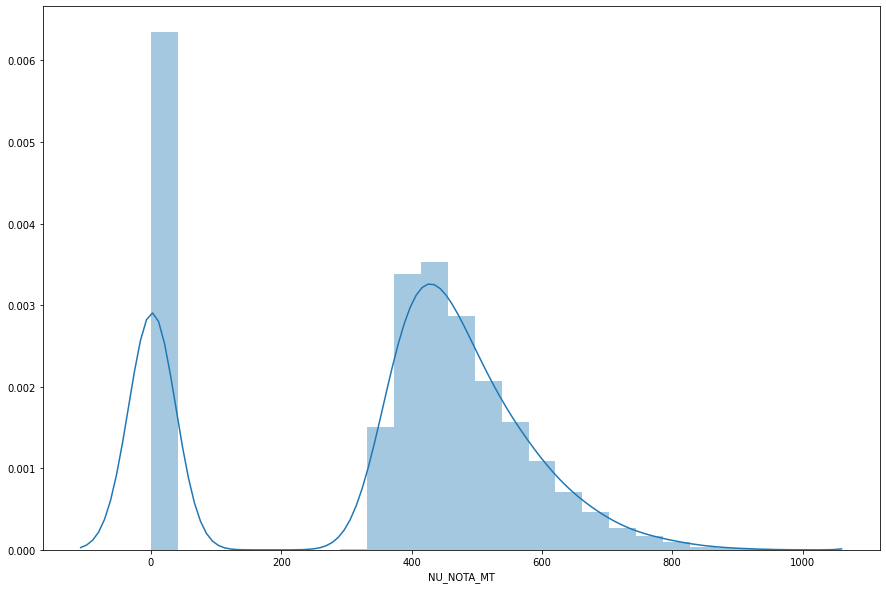

In [104]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df_clean['NU_NOTA_MT'])

In [105]:
regressor = LinearRegression()  
regressor.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [116]:
data_test = pd.read_csv('/content/sample_data/test.csv')
data_test.shape
data_test.columns
list(data_test.columns)
data_test


,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,464.8,443.5,431.8,0,1.0,120.0,80.0,80.0,100.0,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,c8328ebc6f3238e06076c481bc1b82b8301e7a3f,f48d390ab6a2428e659c37fb8a9d00afde621889,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,391.1,491.1,548.0,1,1.0,120.0,120.0,120.0,120.0,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,3.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,595.9,622.7,613.6,0,1.0,80.0,40.0,40.0,80.0,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,5aebe5cad7fabc1545ac7fba07a4e6177f98483c,767a32545304ed293242d528f54d4edb1369f910,592.9,492.6,571.4,1,1.0,100.0,80.0,60.0,80.0,0.0,320.0,D,H,H,C,B,A,NaN,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4571,dac0f22429c7f8e3931d0abaf5dfc8e5c772a48b,41,PR,17,F,1,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,398.3,558.2,511.6,0,1.0,120.0,120.0,120.0,100.0,40.0,500.0,E,E,D,A,B,A,NaN,A
4572,a75fa8770257e7c9368d059fe53d9ef431f4bdef,35,SP,17,M,2,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,427.6,579.7,471.1,1,1.0,100.0,100.0,100.0,120.0,100.0,520.0,C,C,C,A,A,A,NaN,A
4573,655fa6306720ff16e825903b5422a46608a77545,35,SP,19,M,1,1,1,2,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,639.2,643.8,604.9,0,1.0,160.0,140.0,120.0,140.0,80.0,640.0,D,F,D,B,B,A,NaN,D
4574,1f4bc3e3d56212d500625bfe8ac78ccff4362293,52,GO,17,M,2,2,3,0,1,NaN,1,NaN,0,0,0,0,0,0,0,0,1,1,1,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,427.1,467.9,540.2,1,1.0,140.0,80.0,80.0,140.0,80.0,520.0,C,E,C,A,A,A,NaN,A


In [117]:
cleanup_nums = {"TP_SEXO": {"M": 0, "F": 1}}
df_clean_teste = data_test
df_clean_teste.replace(cleanup_nums, inplace=True)
df_clean_teste = df_clean_teste.fillna(2)
df_clean_teste.head(10)

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,1,3,1,1,5,1,2.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,464.8,443.5,431.8,0,1.0,120.0,80.0,80.0,100.0,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,1,3,1,1,8,1,2.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,c8328ebc6f3238e06076c481bc1b82b8301e7a3f,f48d390ab6a2428e659c37fb8a9d00afde621889,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,391.1,491.1,548.0,1,1.0,120.0,120.0,120.0,120.0,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,0,1,1,2,0,2,3.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,595.9,622.7,613.6,0,1.0,80.0,40.0,40.0,80.0,80.0,320.0,E,E,D,B,B,A,2,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,1,3,1,1,8,1,2.0,0,2.0,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2.0,2.0,2.0,0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,H,E,G,B,B,A,2,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,0,1,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,5aebe5cad7fabc1545ac7fba07a4e6177f98483c,767a32545304ed293242d528f54d4edb1369f910,592.9,492.6,571.4,1,1.0,100.0,80.0,60.0,80.0,0.0,320.0,D,H,H,C,B,A,2,A
5,e656d6bad65c93fb2880f1eba5037008c8e75774,43,RS,18,0,3,1,1,1,1,2.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,414.5,568.5,542.5,1,1.0,120.0,120.0,120.0,120.0,80.0,560.0,E,E,C,B,B,A,2,A
6,465cd2a6907fb37d9d8ad3c065f0e2dabdba9b13,35,SP,17,1,1,1,2,0,3,1.0,0,4.0,0,0,0,0,0,0,0,0,1,1,1,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,485.7,654.6,606.6,0,1.0,140.0,120.0,120.0,120.0,120.0,620.0,D,E,H,D,B,A,2,D
7,11539e86171bf07d3a36f09377d7f54ebcc8406a,23,CE,17,1,3,2,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,423.2,521.0,451.8,0,1.0,100.0,80.0,80.0,100.0,60.0,420.0,D,C,B,A,A,A,2,A
8,043c544a2104aa8a9849f1a703a08d37a2f16839,51,MT,18,1,3,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,5aebe5cad7fabc1545ac7fba07a4e6177f98483c,767a32545304ed293242d528f54d4edb1369f910,414.4,577.6,548.6,1,1.0,120.0,160.0,160.0,140.0,160.0,740.0,B,D,C,A,A,B,D,A
9,76ba050e64ad100b856f0eaabd8f539d5c7dd185,15,PA,17,0,3,2,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,456.8,518.5,488.7,0,1.0,120.0,120.0,120.0,120.0,100.0,580.0,B,C,B,A,A,A,2,A


In [0]:
X_test = df_clean_teste[[
 'CO_UF_RESIDENCIA',
 'NU_IDADE',
 'TP_SEXO',
 'TP_COR_RACA',
 'TP_NACIONALIDADE',
 'TP_ST_CONCLUSAO',
 'TP_ANO_CONCLUIU',
 'TP_ESCOLA',
 'TP_ENSINO',
 'IN_TREINEIRO',
 'TP_DEPENDENCIA_ADM_ESC',
 'IN_BAIXA_VISAO',
 'IN_CEGUEIRA',
 'IN_SURDEZ',
 'IN_DISLEXIA',
 'IN_DISCALCULIA',
 'IN_SABATISTA',
 'IN_GESTANTE',
 'IN_IDOSO',
 'TP_PRESENCA_CN',
 'TP_PRESENCA_CH',
 'TP_PRESENCA_LC',
 'NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'TP_LINGUA',
 'TP_STATUS_REDACAO',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_REDACAO']].values

In [132]:
y_pred = regressor.predict(X_test)
y_pred
df = pd.DataFrame({'NU_NOTA_MT': y_pred})
answer = pd.concat([df_clean_teste['NU_INSCRICAO'], df], axis=1)
answer.loc[answer.NU_NOTA_MT < 0, 'NU_NOTA_MT'] = 0
answer



,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,434.004127
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,443.784760
2,b38a03232f43b11c9d0788abaf060f7366053b6d,568.140608
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,0.000000
4,715494628a50142ce8cb17191cfe6d0f3cae0934,540.093893
...,...,...
4571,dac0f22429c7f8e3931d0abaf5dfc8e5c772a48b,443.802959
4572,a75fa8770257e7c9368d059fe53d9ef431f4bdef,463.611976
4573,655fa6306720ff16e825903b5422a46608a77545,616.745016
4574,1f4bc3e3d56212d500625bfe8ac78ccff4362293,482.331097


In [0]:
answer.to_csv('/content/sample_data/answer.csv', index = False)

Verificar probabilidade de acerto


In [0]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.2, random_state=0)

In [136]:
regressor = LinearRegression()  
regressor.fit(X_treino, Y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
Y_predict = regressor.predict(X_teste)

In [146]:
df = pd.DataFrame({'Actual': Y_teste, 'Predicted': Y_predict})
df1 = df.head(25)
df1

,Actual,Predicted
0,2.0,-3.788745
1,663.0,570.873721
2,466.9,445.878718
3,413.2,421.930251
4,360.8,495.988754
5,683.0,665.810299
6,424.4,466.561392
7,546.8,547.386190
8,429.8,475.804467
9,354.6,415.695769


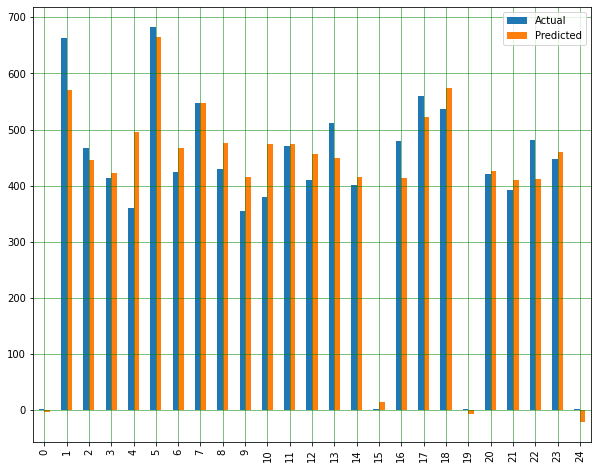

In [147]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()